In [1]:
!pip install -q darts

     |████████████████████████████████| 290 kB 30.8 MB/s 
     |████████████████████████████████| 1.4 MB 41.0 MB/s 
     |████████████████████████████████| 177 kB 53.2 MB/s 
     |████████████████████████████████| 11.2 MB 39.0 MB/s 
     |████████████████████████████████| 9.8 MB 11.4 MB/s 
     |████████████████████████████████| 155 kB 60.8 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 791 kB 39.3 MB/s 
     |████████████████████████████████| 374 kB 52.7 MB/s 
     |████████████████████████████████| 884 kB 45.8 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 216 kB 58.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 24.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.14.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import BlockRNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/airline-passengers.csv')

In [5]:
series = TimeSeries.from_dataframe(df,'Month','Passengers')

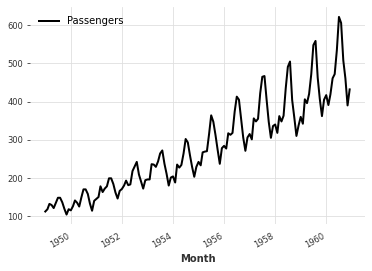

In [6]:
series.plot()

In [15]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('19600101'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [17]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=1000),
                                             attribute='year', one_hot=False)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp('19600101'))

In [18]:
my_model = BlockRNNModel(
    model='LSTM',
    input_chunk_length=12,
    output_chunk_length=10,
    n_epochs=300,
    random_state=0
)

In [19]:
my_model.fit(train_transformed,
             past_covariates=cov_train,
             verbose=True)

[2021-12-10 07:28:18,302] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 112 samples.
[2021-12-10 07:28:18,302] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 112 samples.
[2021-12-10 07:28:18,308] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-10 07:28:18,308] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 3/300 [00:00<00:14, 21.20it/s]

  5%|▌         | 15/300 [00:00<00:13, 21.20it/s]

  8%|▊         | 24/300 [00:01<00:13, 20.98it/s]

 11%|█         | 33/300 [00:01<00:12, 21.05it/s]

 14%|█▍        | 42/300 [00:01<00:12, 20.78it/s]

 18%|█▊        | 54/300 [00:02<00:11, 21.32it/s]

 21%|██        | 63/300 [00:02<00:11, 21.23it/s]

 25%|██▌       | 75/300 [00:03<00:10, 21.79it/s]

 28%|██▊       | 84/300 [00:03<00:09, 21.97it/s]

 31%|███       | 93/300 [00:04<00:09, 21.33it/s]

 35%|███▌      | 105/300 [00:04<00:08, 21.69it/s]

 38%|███▊      | 114/300 [00:05<00:09, 20.38it/s]

 41%|████      | 123/300 [00:05<00:08, 20.23it/s]

 45%|████▌     | 135/300 [00:06<00:07, 20.71it/s]

 48%|████▊     | 144/300 [00:06<00:07, 21.00it/s]

 51%|█████     | 153/300 [00:07<00:07, 20.21it/s]

 55%|█████▌    | 165/300 [00:07<00:06, 20.87it/s]

 58%|█████▊    | 174/300 [00:08<00:05, 21.22it/s]

 61%|██████    | 183/300 [00:08<00:05, 21.49it/s]

 65%|██████▌   | 195/300 [00:09<00:04, 21.70it/s]

 68%|██████▊   | 204/300 [00:09<00:04, 21.81it/s]

 71%|███████   | 213/300 [00:10<00:04, 21.22it/s]

 75%|███████▌  | 225/300 [00:10<00:03, 21.75it/s]

 78%|███████▊  | 234/300 [00:11<00:03, 21.68it/s]

 81%|████████  | 243/300 [00:11<00:02, 21.44it/s]

 85%|████████▌ | 255/300 [00:12<00:02, 21.02it/s]

 88%|████████▊ | 264/300 [00:12<00:01, 21.08it/s]

 91%|█████████ | 273/300 [00:12<00:01, 21.79it/s]

 95%|█████████▌| 285/300 [00:13<00:00, 22.12it/s]

 98%|█████████▊| 294/300 [00:13<00:00, 21.93it/s]

100%|██████████| 300/300 [00:14<00:00, 21.21it/s]


In [20]:
predicted = my_model.predict(n=10)

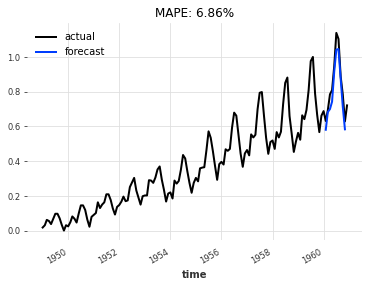

In [21]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed[:11])))
plt.legend()
plt.show()